In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, InputLayer
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

## Data preparation

In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train_hot = to_categorical(y_train, num_classes=10)
y_test_hot = to_categorical(y_test, num_classes=10)
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train has shape  (60000, 28, 28, 1)
y_train has shape  (60000, 10)
X_test has shape  (10000, 28, 28, 1)
y_test has shape  (10000, 10)


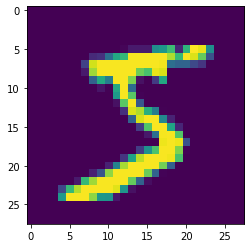

In [44]:
index = 0
print("X_train has shape ", X_train.shape)
print("y_train has shape ", y_train_hot.shape)
print("X_test has shape ", X_test.shape)
print("y_test has shape ", y_test_hot.shape)
plt.imshow(x_train[index])

## Model

### Architecture

In [51]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [55]:
early_stop = EarlyStopping(monitor="val_loss", patience=1)

### Training

In [56]:
model.fit(X_train, y_train_hot, epochs=10, validation_data=(X_test, y_test_hot), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1412 - accuracy: 0.9579 - val_loss: 0.0478 - val_accuracy: 0.9839
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0476 - accuracy: 0.9854 - val_loss: 0.0419 - val_accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0495 - val_accuracy: 0.9843


### Evaluation

In [58]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

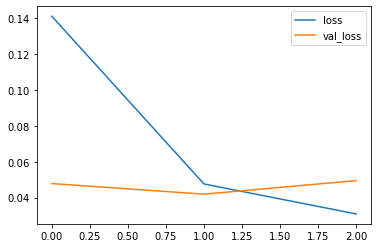

In [60]:
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

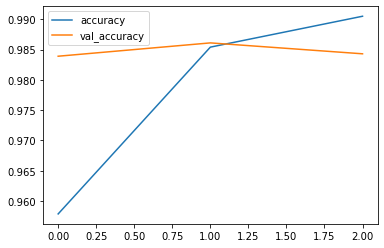

In [61]:
metrics[["accuracy", "val_accuracy"]].plot()

In [62]:
model.evaluate(X_test, y_test_hot, verbose=0)

[0.04945052042603493, 0.9843000173568726]

In [71]:
predictions = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [74]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.97      1.00      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<AxesSubplot:>

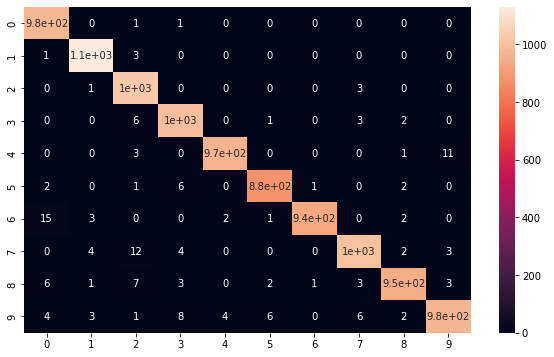

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

### Prediction

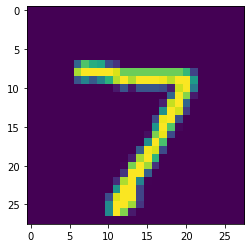

In [82]:
X = X_test[0]
plt.imshow(X.reshape(28, 28))

In [83]:
np.argmax(model.predict(X.reshape(1, 28, 28, 1)), axis=1)

1/1 [==============================] - 0s 19ms/step


array([7])